# Convolutional Neural Networks 
Notebook adapted and inspired from: https://github.com/ageron/handson-ml2/blob/master/14_deep_computer_vision_with_cnns.ipynb


In [1]:
# some imports
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras

assert tf.__version__ >= "2.0"


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
#import seaborn as sns
#sns.set_style("whitegrid")
#sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Convolutional Neural Networks

## What is a Convolution? 

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

filters:


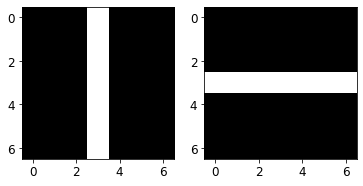

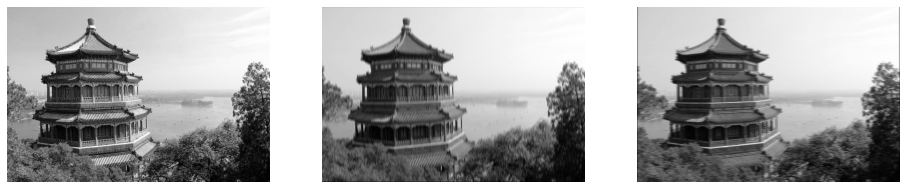

In [3]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

print("filters:")
plt.figure(figsize=(6,3))
plt.subplot(121)
plt.imshow(filters[:,:,:,0],cmap="gray")
plt.subplot(122)
plt.imshow(filters[:,:,:,1],cmap="gray")
plt.show()


outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(images[0, :, :, 0], cmap="gray") # plot 1st image
plt.axis("off") 

plt.subplot(132)
plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 1st feature map
plt.axis("off") 

plt.subplot(133)
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") 
plt.show()

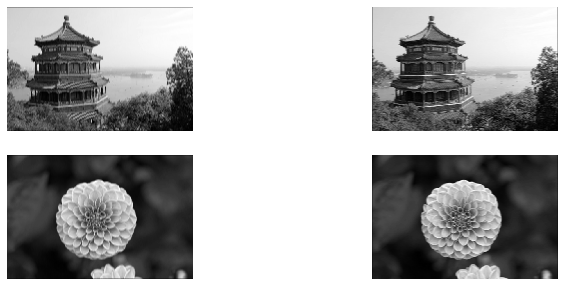

In [4]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

In [5]:

def crop(images):
    return images[150:220, 130:250]

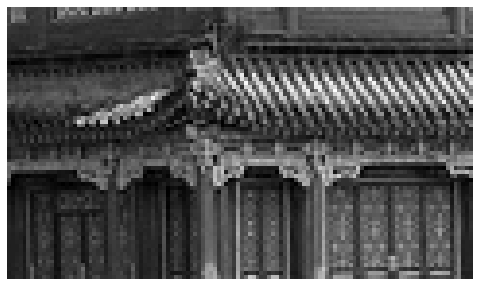

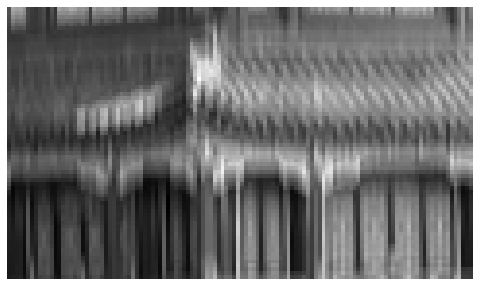

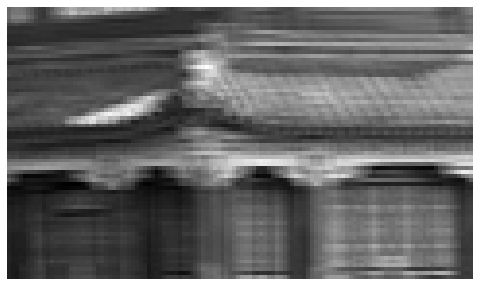

In [6]:
plot_image(crop(images[0, :, :, 0]))
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    plt.show()

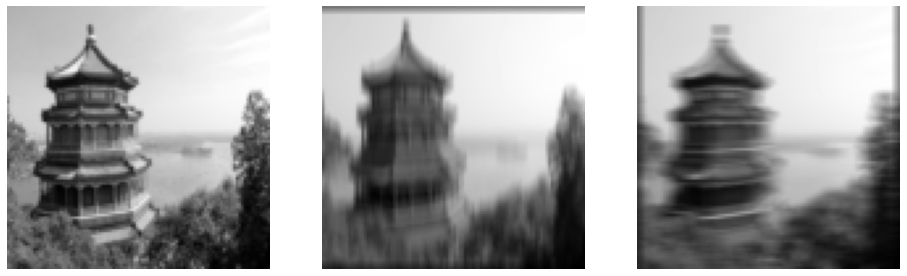

In [7]:
from skimage.transform import rescale, resize, downscale_local_mean

import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = resize(load_sample_image("china.jpg") / 255,(100,100))
flower = resize(load_sample_image("flower.jpg") / 255,(100,100))
images = np.array([china, flower])
batch_size, height, width, channels = images.shape


outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(images[0, :, :, 0], cmap="gray") # plot 1st image
plt.axis("off") 

plt.subplot(132)
plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 1st feature map
plt.axis("off") 

plt.subplot(133)
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") 
plt.show()

## Convolutional Layer

In [8]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="SAME", activation="relu")


In [9]:
## Our first convolution network
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 5s 91us/sample - loss: 0.7247 - accuracy: 0.7624 - val_loss: 0.5047 - val_accuracy: 0.8312
Epoch 2/5
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4927 - accuracy: 0.8288 - val_loss: 0.4494 - val_accuracy: 0.8506
Epoch 3/5
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4457 - accuracy: 0.8436 - val_loss: 0.4310 - val_accuracy: 0.8474
Epoch 4/5
55000/55000 [==============================] - 4s 78us/sample - loss: 0.4192 - accuracy: 0.8529 - val_loss: 0.4131 - val_accuracy: 0.8600
Epoch 5/5
55000/55000 [==============================] - 4s 79us/sample - loss: 0.3991 - accuracy: 0.8594 - val_loss: 0.4158 - val_accuracy: 0.8482


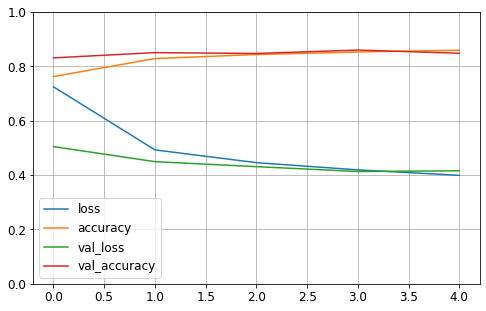

10000/1 - 0s - loss: 0.3610 - accuracy: 0.8303


[0.461680716085434, 0.8303]

In [10]:
## without convolutionals

# create the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# define loss function, optimizer and metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# train the model and validate using val data
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

# plot training curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# evaluate the model using test data
model.evaluate(X_test, y_test,verbose=2)

In [11]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [17]:
history = {}

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                200768    
_________________________________________________________________
dense_24 (Dense)             (None, 10)              

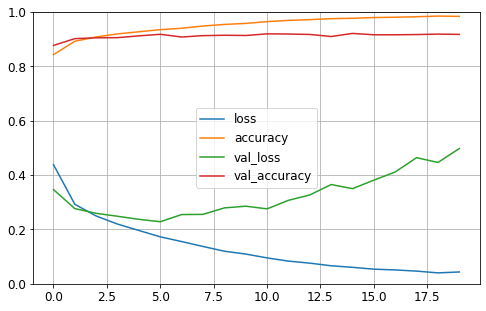

10000/1 - 1508s - loss: 1.3970 - accuracy: 0.9088


[0.5687008204707876, 0.9088]

In [58]:
## with convolutionals
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

# create the model
model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax'),
])

# define loss function, optimizer and metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

print(model.summary())

# train the model and validate using val data
history['original'] = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

# plot training curves
pd.DataFrame(history['original'].history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# evaluate the model using test data
model.evaluate(X_test, y_test,verbose=2)

## Avoid overfitting through regularization

### $L_1$ and $L_2$ regularization

Just as we saw in linear models, we can use $l_1$ and $l_2$ regularization to constrain our model parameters.

```python
layer = keras.layers.Dense(100, activation="relu",
                           kernel_regularizer=keras.regularizers.l2(0.01))

layer = keras.layers.Dense(100, activation="relu",
                           kernel_regularizer=keras.regularizers.l1(0.01))
```

### Dropout

Dropout is one of the most popular regularization techniques for deep neural networks. The key idea is really simple: **randomly drop units** (along with their connections) from the neural network during training. In these way, we avoit to have specialized units for a task, as they will be randomly died.

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                200768    
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)              

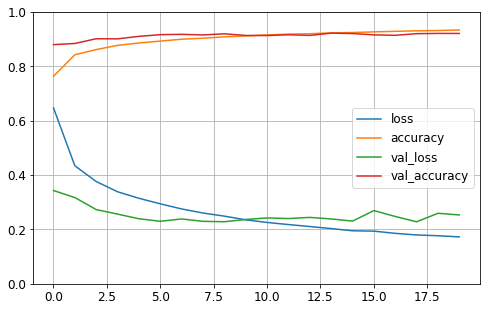

10000/1 - 2s - loss: 0.1718 - accuracy: 0.9150


[0.31100565147548914, 0.915]

In [59]:
## with convolutionals
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

# create the model
model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

# define loss function, optimizer and metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

print(model.summary())

# train the model and validate using val data
history['dropout'] = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

# plot training curves
pd.DataFrame(history['dropout'].history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# evaluate the model using test data
model.evaluate(X_test, y_test,verbose=2)

## Batch Normalization

The vanishing/Exploding gradients problem is one of the main issues we can find when training a neural network. As we already know, the algorithm computes the gradients of the cost function with regards to each parameter, and it uses these gradients in order to update each parameter with a Gradient Descent step.

Unfortunatly, on deep networks it is commonn that gradients gets smaller and smaller as as the algorithm progress in the lower levels. To overcome this problem several strategies can be used as for instance: 1) use not saturated activated fuctions; 2) "smart" parameter initialization; 3) Batch Normalization. 

**Batch normalization** is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 3136)            

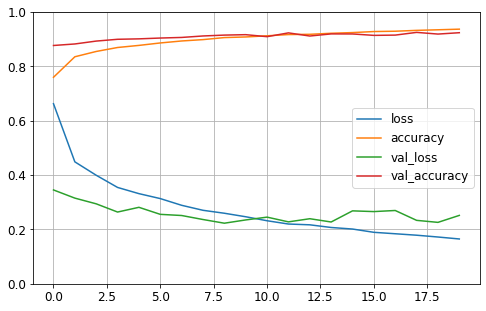

10000/1 - 2s - loss: 0.3095 - accuracy: 0.9177


[0.29541030890494585, 0.9177]

In [60]:
## with convolutionals
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

# create the model
model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

# define loss function, optimizer and metrics
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

print(model.summary())


# train the model and validate using val data
history['bn'] = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

# plot training curves
pd.DataFrame(history['bn'].history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# evaluate the model using test data
model.evaluate(X_test, y_test,verbose=2)

<AxesSubplot:>

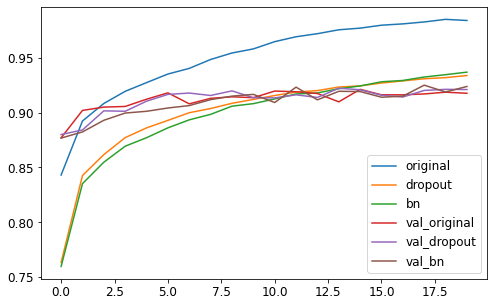

In [61]:

df = pd.DataFrame()
df['original'] = history['original'].history['accuracy']
df['dropout'] = history['dropout'].history['accuracy']
df['bn'] = history['bn'].history['accuracy']

df['val_original'] = history['original'].history['val_accuracy']
df['val_dropout'] = history['dropout'].history['val_accuracy']
df['val_bn'] = history['bn'].history['val_accuracy']
df.plot(figsize=(8, 5))

## ResNet-34

![ResNet34](https://miro.medium.com/max/512/1*kBlZtheCjJiA3F1e0IurCw.png)

In [87]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)
    

In [88]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[224, 224, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [89]:
model.summary()


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 112, 112, 64)      9408      
_________________________________________________________________
batch_normalization_81 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
activation_3 (Activation)    (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
residual_unit_32 (ResidualUn (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_33 (ResidualUn (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_34 (ResidualUn (None, 56, 56, 64)      

## Using a pretrained model

In [75]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")


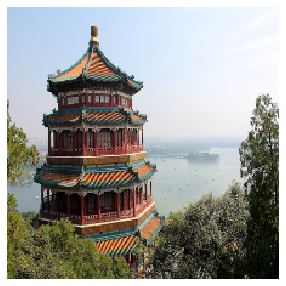

In [76]:
# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

images_resized = tf.image.resize(images, [224, 224])
plot_color_image(images_resized[0])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


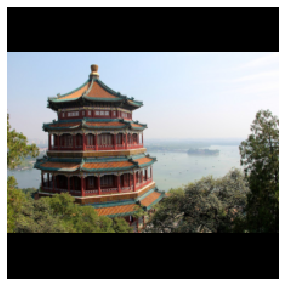

In [77]:
images_resized = tf.image.resize_with_pad(images, 224, 224, antialias=True)
plot_color_image(images_resized[0])

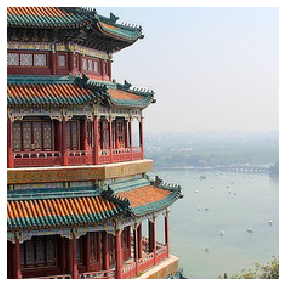

In [78]:
images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)
plot_color_image(images_resized[0])
plt.show()

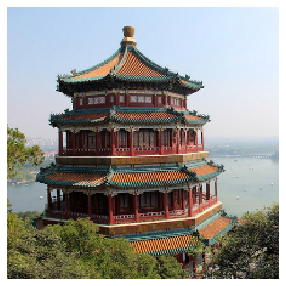

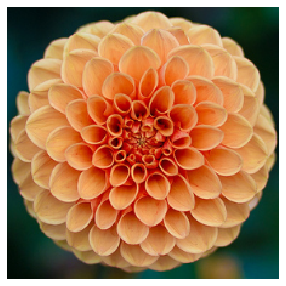

In [79]:
china_box = [0, 0.03, 1, 0.68]
flower_box = [0.19, 0.26, 0.86, 0.7]
images_resized = tf.image.crop_and_resize(images, [china_box, flower_box], [0, 1], [224, 224])
plot_color_image(images_resized[0])
plt.show()
plot_color_image(images_resized[1])
plt.show()

In [80]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)
Y_proba = model.predict(inputs)

In [81]:
Y_proba.shape


(2, 1000)

In [82]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()


Image #0
  n03877845 - palace       43.39%
  n02825657 - bell_cote    43.07%
  n03781244 - monastery    11.70%

Image #1
  n04522168 - vase         53.96%
  n07930864 - cup          9.52%
  n11939491 - daisy        4.97%



# Data Augmentation / Preprocessing

In [97]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset tf_flowers downloaded and prepared to /Users/santisegui/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [101]:
info.splits,info.splits["train"]

({'train': <tfds.core.SplitInfo num_examples=3670>},
 <tfds.core.SplitInfo num_examples=3670>)

In [105]:
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes
class_names,n_classes

(['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses'], 5)

In [106]:
dataset_size = info.splits["train"].num_examples
dataset_size

3670

In [107]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

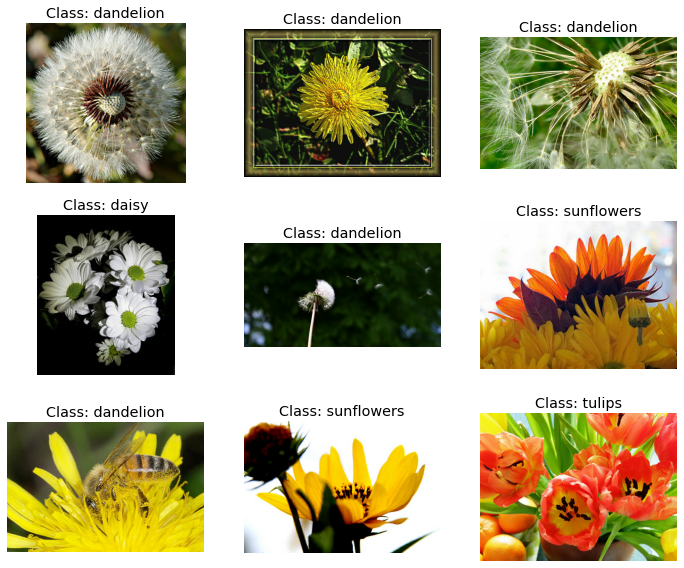

In [108]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

basic preprocessing

In [109]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

classical data augmentation

In [110]:
def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

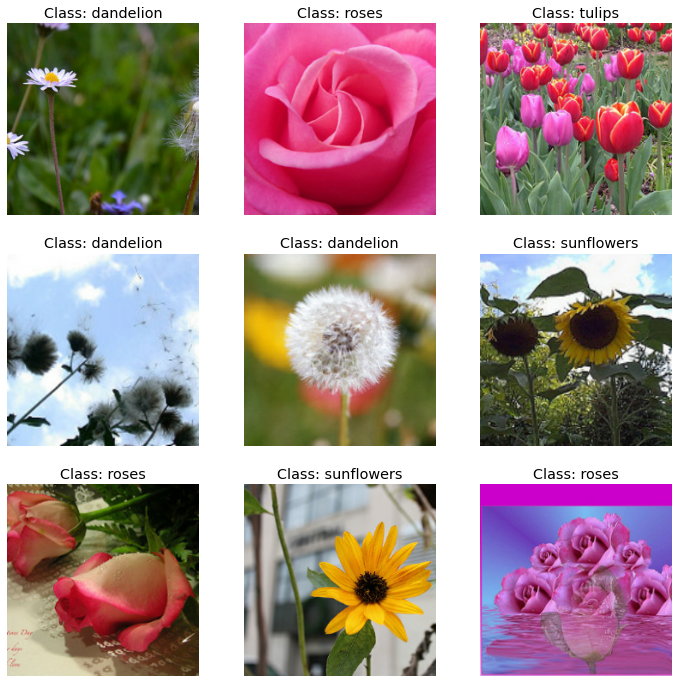

In [112]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

In [120]:
base_model = keras.applications.resnet50.ResNet50(weights="imagenet",
                                                  include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [121]:
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

0 input_5
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [122]:
for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Train for 86 steps, validate for 17 steps
Epoch 1/5
86/86 [==============================] - 248s 3s/step - loss: 10.0341 - accuracy: 0.7693 - val_loss: 51.7199 - val_accuracy: 0.1765
Epoch 2/5
86/86 [==============================] - 241s 3s/step - loss: 3.5285 - accuracy: 0.8986 - val_loss: 52.6469 - val_accuracy: 0.1783
Epoch 3/5
86/86 [==============================] - 230s 3s/step - loss: 2.3034 - accuracy: 0.9190 - val_loss: 51.6408 - val_accuracy: 0.1746
Epoch 4/5
86/86 [==============================] - 234s 3s/step - loss: 1.5796 - accuracy: 0.9357 - val_loss: 46.5177 - val_accuracy: 0.1746
Epoch 5/5
86/86 [==============================] - 255s 3s/step - loss: 1.2731 - accuracy: 0.9390 - val_loss: 45.2904 - val_accuracy: 0.1765
